In [1]:
from environments import ZeroDCleanupEnv
import numpy as np
import torch
from agents import UAgent
from tqdm import tqdm

2023-11-29 00:53:27,439	WARNING deprecation.py:50 -- DeprecationWarning: `DirectStepOptimizer` has been deprecated. This will raise an error in the future!


In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"cuda available: {torch.cuda.is_available()}")
np.set_printoptions(threshold=np.inf)

cuda available: False


In [3]:
num_agents = 10
reward_multiplier = 10

# for printing options
pp = False
verbose = False
verbose_episode = 200  # start printing at which epoch

In [4]:
thresholdDepletion = 0.4
thresholdRestoration = 0.0
wasteSpawnProbability = 0.5
appleRespawnProbability = 0.05
dirt_multiplier = 10
division_ep = 1e-7

In [5]:
gamma = 0.999
epsilon = 1.0
epsilon_decay = 0.99995
epsilon_min = 0.1
lr = 0.0001
batch_size = 8

In [6]:
num_agents = 10
agent_ids = [str(i) for i in range(num_agents)]

In [7]:
state_dim = 4
action_dim = 2

In [8]:
env = ZeroDCleanupEnv(agent_ids=agent_ids, 
                      num_agents=num_agents, 
                      thresholdDepletion=thresholdDepletion,
                        thresholdRestoration=thresholdRestoration,
                        wasteSpawnProbability=wasteSpawnProbability,
                        appleRespawnProbability=appleRespawnProbability,
                        dirt_multiplier=dirt_multiplier,
                        area=150)

agentCoordinator = UAgent(device=device,
                          num_action_outputs=num_agents,
                          action_size=action_dim,
                          buffer_size=4000,
                          batch_size=batch_size,
                          lr=lr,
                          gamma=gamma,
                          epsilon=epsilon,
                          epsilon_decay=epsilon_decay,
                          epsilon_min=epsilon_min,
                          u_layers=[
                              (state_dim, 64),
                              (64, 32),
                              (32, 1)
                          ])

In [9]:
ending_ep_rewards = []
num_episodes = 1000
num_steps_per_epsiode = 1000

In [10]:
max_reward = 0
for episode in range(num_episodes):
    print(f"========= Episode {episode} =========")

    states, info = env.reset()
    #states = np.concatenate(list(states.values()), axis=0)
    state = states[agent_ids[0]]
    #num_apples, num_dirt, _, _ = state
    #state = np.array([num_apples, num_dirt])

    print(f"info: {info}")

    for step in tqdm(range(num_steps_per_epsiode)):
        actions_list = agentCoordinator.act(env)[0]
        actions = {agent_id: actions_list[i] for i, agent_id in enumerate(agent_ids)}
        next_states, reward, dones, _, info = env.step(actions)
        #next_states = np.concatenate(list(next_states.values()), axis=0)
        next_state = next_states[agent_ids[0]]
        #num_apples, num_dirt, _, _ = next_state
        #next_state = np.array([num_apples, num_dirt])
        #reward_graph.append(reward)
        agentCoordinator.step(state, reward, next_state)

        if episode > verbose_episode:
            print(f"========= Step {step} =========")
            print(f"info: {info}")

        state = next_state

        if dones["__all__"]:
            break 

    ending_reward = info["total_apple_consumed"]

    

    print(f"ending reward: {ending_reward}")
    #print(f"reward graph: {reward_graph}")
    print(f"========= End of Episode {episode} =========")

    ending_ep_rewards.append(ending_reward)

    agentCoordinator.scheduler.step()

    if ending_ep_rewards[-1] > 2700 and ending_ep_rewards[-2] > 2700 and agentCoordinator.epsilon < 0.1 and ending_ep_rewards[-1] > max_reward:
        break

    if ending_reward > max_reward:
        max_reward = ending_reward

    

#torch.save(agentCoordinator.q_network.state_dict(), "results/q_simple_" + str(test_id) + "/q_network.pt")

        

========= Episode 0 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1460.96it/s]


ending reward: 2604.928798510384
========= End of Episode 0 =========
========= Episode 1 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 2050.35it/s]


ending reward: 2673.616331001097
========= End of Episode 1 =========
========= Episode 2 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1913.80it/s]


ending reward: 2675.2705190820075
========= End of Episode 2 =========
========= Episode 3 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1955.99it/s]


ending reward: 2650.989179206663
========= End of Episode 3 =========
========= Episode 4 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 2031.73it/s]


ending reward: 2485.708365783069
========= End of Episode 4 =========
========= Episode 5 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1989.93it/s]


ending reward: 2443.815249691274
========= End of Episode 5 =========
========= Episode 6 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1938.94it/s]


ending reward: 2363.106418407568
========= End of Episode 6 =========
========= Episode 7 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1999.98it/s]


ending reward: 2170.278414911684
========= End of Episode 7 =========
========= Episode 8 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1701.82it/s]


ending reward: 2577.4494821552985
========= End of Episode 8 =========
========= Episode 9 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1829.48it/s]


ending reward: 2579.821260460814
========= End of Episode 9 =========
========= Episode 10 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1915.47it/s]


ending reward: 2093.9412436166303
========= End of Episode 10 =========
========= Episode 11 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1894.73it/s]


ending reward: 2432.0802921229515
========= End of Episode 11 =========
========= Episode 12 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1849.16it/s]


ending reward: 1932.4012695113872
========= End of Episode 12 =========
========= Episode 13 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1866.68it/s]


ending reward: 2404.4723749252807
========= End of Episode 13 =========
========= Episode 14 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1964.72it/s]


ending reward: 2363.362272002807
========= End of Episode 14 =========
========= Episode 15 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1919.51it/s]


ending reward: 2461.895550906561
========= End of Episode 15 =========
========= Episode 16 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1929.23it/s]


ending reward: 1553.1814908898787
========= End of Episode 16 =========
========= Episode 17 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1914.13it/s]


ending reward: 2051.8963807283644
========= End of Episode 17 =========
========= Episode 18 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1704.39it/s]


ending reward: 1893.9546897204486
========= End of Episode 18 =========
========= Episode 19 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1810.13it/s]


ending reward: 1661.277240762987
========= End of Episode 19 =========
========= Episode 20 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1852.70it/s]


ending reward: 1849.5832376518981
========= End of Episode 20 =========
========= Episode 21 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1813.88it/s]


ending reward: 2218.007885241716
========= End of Episode 21 =========
========= Episode 22 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1855.78it/s]


ending reward: 1922.7739231230453
========= End of Episode 22 =========
========= Episode 23 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1835.22it/s]


ending reward: 1564.0254890723143
========= End of Episode 23 =========
========= Episode 24 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1751.79it/s]


ending reward: 1997.3820285093923
========= End of Episode 24 =========
========= Episode 25 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1750.57it/s]


ending reward: 993.3939496918196
========= End of Episode 25 =========
========= Episode 26 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1791.79it/s]


ending reward: 1770.6997457381917
========= End of Episode 26 =========
========= Episode 27 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1566.33it/s]


ending reward: 2052.6842087627024
========= End of Episode 27 =========
========= Episode 28 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1793.91it/s]


ending reward: 1027.5806539734735
========= End of Episode 28 =========
========= Episode 29 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1749.43it/s]


ending reward: 1135.4233939341757
========= End of Episode 29 =========
========= Episode 30 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1519.82it/s]


ending reward: 1560.3606176682492
========= End of Episode 30 =========
========= Episode 31 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1789.01it/s]


ending reward: 1794.0918526998673
========= End of Episode 31 =========
========= Episode 32 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1819.06it/s]


ending reward: 1263.2734082721356
========= End of Episode 32 =========
========= Episode 33 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1779.65it/s]


ending reward: 1433.9347711248017
========= End of Episode 33 =========
========= Episode 34 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1764.72it/s]


ending reward: 551.3637503488594
========= End of Episode 34 =========
========= Episode 35 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1818.35it/s]


ending reward: 1890.5626274627928
========= End of Episode 35 =========
========= Episode 36 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1710.69it/s]


ending reward: 1203.3197959608358
========= End of Episode 36 =========
========= Episode 37 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1796.84it/s]


ending reward: 2043.8842232435475
========= End of Episode 37 =========
========= Episode 38 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1754.02it/s]


ending reward: 1015.3251461885956
========= End of Episode 38 =========
========= Episode 39 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1778.15it/s]


ending reward: 355.44415500373975
========= End of Episode 39 =========
========= Episode 40 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1770.12it/s]


ending reward: 244.57246470222725
========= End of Episode 40 =========
========= Episode 41 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1592.78it/s]


ending reward: 2546.8073055860496
========= End of Episode 41 =========
========= Episode 42 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1473.37it/s]


ending reward: 2268.3696518075867
========= End of Episode 42 =========
========= Episode 43 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1488.95it/s]


ending reward: 1803.4170865496196
========= End of Episode 43 =========
========= Episode 44 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1667.18it/s]


ending reward: 193.84709531069467
========= End of Episode 44 =========
========= Episode 45 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1664.68it/s]


ending reward: 140.18278420655858
========= End of Episode 45 =========
========= Episode 46 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1737.20it/s]


ending reward: 544.9313424582273
========= End of Episode 46 =========
========= Episode 47 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1496.78it/s]


ending reward: 2074.4542064836332
========= End of Episode 47 =========
========= Episode 48 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1533.78it/s]


ending reward: 2206.569945345757
========= End of Episode 48 =========
========= Episode 49 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1621.76it/s]


ending reward: 1710.6174357086343
========= End of Episode 49 =========
========= Episode 50 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1745.13it/s]


ending reward: 2136.456462117046
========= End of Episode 50 =========
========= Episode 51 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1652.03it/s]


ending reward: 1480.6158744664854
========= End of Episode 51 =========
========= Episode 52 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1753.48it/s]


ending reward: 662.0494511806036
========= End of Episode 52 =========
========= Episode 53 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1464.59it/s]


ending reward: 926.3191119732346
========= End of Episode 53 =========
========= Episode 54 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1774.29it/s]


ending reward: 811.1050732766314
========= End of Episode 54 =========
========= Episode 55 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1638.57it/s]


ending reward: 2079.61129533973
========= End of Episode 55 =========
========= Episode 56 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1627.22it/s]


ending reward: 1153.8830919054262
========= End of Episode 56 =========
========= Episode 57 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1793.04it/s]


ending reward: 1381.1389628267646
========= End of Episode 57 =========
========= Episode 58 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1803.53it/s]


ending reward: 1632.5156028504036
========= End of Episode 58 =========
========= Episode 59 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1705.50it/s]


ending reward: 610.801712943182
========= End of Episode 59 =========
========= Episode 60 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1800.59it/s]


ending reward: 1498.8674581143302
========= End of Episode 60 =========
========= Episode 61 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1753.68it/s]


ending reward: 1844.8567911739863
========= End of Episode 61 =========
========= Episode 62 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1755.14it/s]


ending reward: 1621.416780489009
========= End of Episode 62 =========
========= Episode 63 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1786.28it/s]


ending reward: 898.8791321043448
========= End of Episode 63 =========
========= Episode 64 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1810.33it/s]


ending reward: 1639.2243896415537
========= End of Episode 64 =========
========= Episode 65 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1688.41it/s]


ending reward: 1222.5341249819073
========= End of Episode 65 =========
========= Episode 66 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1800.22it/s]


ending reward: 2092.387926820917
========= End of Episode 66 =========
========= Episode 67 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1578.60it/s]


ending reward: 2365.82291452623
========= End of Episode 67 =========
========= Episode 68 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1630.93it/s]


ending reward: 2305.544888323191
========= End of Episode 68 =========
========= Episode 69 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1806.42it/s]


ending reward: 1202.398081917414
========= End of Episode 69 =========
========= Episode 70 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1808.31it/s]


ending reward: 1411.650296118557
========= End of Episode 70 =========
========= Episode 71 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1713.56it/s]


ending reward: 1571.2759304382162
========= End of Episode 71 =========
========= Episode 72 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1778.67it/s]


ending reward: 2175.9105490069337
========= End of Episode 72 =========
========= Episode 73 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1790.30it/s]


ending reward: 2130.153867455836
========= End of Episode 73 =========
========= Episode 74 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1466.24it/s]


ending reward: 2128.0704645787655
========= End of Episode 74 =========
========= Episode 75 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1676.89it/s]


ending reward: 2157.8385513277635
========= End of Episode 75 =========
========= Episode 76 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1753.27it/s]


ending reward: 2265.8189485669122
========= End of Episode 76 =========
========= Episode 77 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1613.64it/s]


ending reward: 506.13999808071753
========= End of Episode 77 =========
========= Episode 78 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1762.45it/s]


ending reward: 741.2370815574748
========= End of Episode 78 =========
========= Episode 79 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1700.85it/s]


ending reward: 2043.4112253557803
========= End of Episode 79 =========
========= Episode 80 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1346.41it/s]


ending reward: 915.9387508356616
========= End of Episode 80 =========
========= Episode 81 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1680.99it/s]


ending reward: 2194.491217149664
========= End of Episode 81 =========
========= Episode 82 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1663.31it/s]


ending reward: 1883.157468103593
========= End of Episode 82 =========
========= Episode 83 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1720.65it/s]


ending reward: 2085.1065071983558
========= End of Episode 83 =========
========= Episode 84 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1763.53it/s]


ending reward: 1508.9651550208168
========= End of Episode 84 =========
========= Episode 85 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1669.98it/s]


ending reward: 884.5542425113615
========= End of Episode 85 =========
========= Episode 86 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1670.05it/s]


ending reward: 2019.885390849038
========= End of Episode 86 =========
========= Episode 87 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1715.33it/s]


ending reward: 2243.6089433452435
========= End of Episode 87 =========
========= Episode 88 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1656.58it/s]


ending reward: 2394.4103080411373
========= End of Episode 88 =========
========= Episode 89 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1732.28it/s]


ending reward: 1440.8625244477712
========= End of Episode 89 =========
========= Episode 90 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1711.17it/s]


ending reward: 2313.30017023108
========= End of Episode 90 =========
========= Episode 91 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1642.80it/s]


ending reward: 1731.2074991058714
========= End of Episode 91 =========
========= Episode 92 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1586.19it/s]


ending reward: 2047.902722649677
========= End of Episode 92 =========
========= Episode 93 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1655.83it/s]


ending reward: 1768.3700326119647
========= End of Episode 93 =========
========= Episode 94 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1778.53it/s]


ending reward: 1466.8830993850866
========= End of Episode 94 =========
========= Episode 95 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1759.54it/s]


ending reward: 1534.312505246697
========= End of Episode 95 =========
========= Episode 96 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1604.54it/s]


ending reward: 2081.04604272763
========= End of Episode 96 =========
========= Episode 97 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1759.23it/s]


ending reward: 2532.514350559444
========= End of Episode 97 =========
========= Episode 98 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1751.99it/s]


ending reward: 2123.644638374573
========= End of Episode 98 =========
========= Episode 99 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1675.29it/s]


ending reward: 1866.2678024294596
========= End of Episode 99 =========
========= Episode 100 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1790.31it/s]


ending reward: 1691.405057713044
========= End of Episode 100 =========
========= Episode 101 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1751.25it/s]


ending reward: 2302.076061968508
========= End of Episode 101 =========
========= Episode 102 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1701.32it/s]


ending reward: 2023.0922145357279
========= End of Episode 102 =========
========= Episode 103 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1645.18it/s]


ending reward: 210.61845424088344
========= End of Episode 103 =========
========= Episode 104 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1554.21it/s]


ending reward: 1652.924330916073
========= End of Episode 104 =========
========= Episode 105 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1614.63it/s]


ending reward: 1230.024703236263
========= End of Episode 105 =========
========= Episode 106 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1740.98it/s]


ending reward: 1258.873121678548
========= End of Episode 106 =========
========= Episode 107 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1774.90it/s]


ending reward: 2126.676856674247
========= End of Episode 107 =========
========= Episode 108 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1583.37it/s]


ending reward: 1418.2644749892522
========= End of Episode 108 =========
========= Episode 109 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1706.56it/s]


ending reward: 1812.894078767256
========= End of Episode 109 =========
========= Episode 110 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1481.06it/s]


ending reward: 1579.713785332534
========= End of Episode 110 =========
========= Episode 111 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1690.06it/s]


ending reward: 1907.027662405615
========= End of Episode 111 =========
========= Episode 112 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1735.63it/s]


ending reward: 2338.5816945883566
========= End of Episode 112 =========
========= Episode 113 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1527.22it/s]


ending reward: 2202.1600056188927
========= End of Episode 113 =========
========= Episode 114 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1767.19it/s]


ending reward: 1315.8568150702158
========= End of Episode 114 =========
========= Episode 115 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1757.12it/s]


ending reward: 2108.958775103278
========= End of Episode 115 =========
========= Episode 116 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1732.43it/s]


ending reward: 1011.392741648584
========= End of Episode 116 =========
========= Episode 117 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1790.36it/s]


ending reward: 2437.105656595107
========= End of Episode 117 =========
========= Episode 118 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1750.79it/s]


ending reward: 1955.488688026065
========= End of Episode 118 =========
========= Episode 119 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1748.79it/s]


ending reward: 936.2815116977525
========= End of Episode 119 =========
========= Episode 120 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1752.67it/s]


ending reward: 1760.6164109340584
========= End of Episode 120 =========
========= Episode 121 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1797.57it/s]


ending reward: 1502.1745795901961
========= End of Episode 121 =========
========= Episode 122 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1753.27it/s]


ending reward: 2264.494615785388
========= End of Episode 122 =========
========= Episode 123 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1752.53it/s]


ending reward: 2232.093923686615
========= End of Episode 123 =========
========= Episode 124 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1799.87it/s]


ending reward: 1853.5830822102103
========= End of Episode 124 =========
========= Episode 125 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1659.83it/s]


ending reward: 1953.749767404894
========= End of Episode 125 =========
========= Episode 126 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1797.02it/s]


ending reward: 2161.725381361272
========= End of Episode 126 =========
========= Episode 127 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1783.92it/s]


ending reward: 1656.9614301423348
========= End of Episode 127 =========
========= Episode 128 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1713.35it/s]


ending reward: 2082.8257415270173
========= End of Episode 128 =========
========= Episode 129 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1774.02it/s]


ending reward: 805.8412585830736
========= End of Episode 129 =========
========= Episode 130 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1732.02it/s]


ending reward: 2507.0536333409714
========= End of Episode 130 =========
========= Episode 131 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1772.26it/s]


ending reward: 2005.1459815772466
========= End of Episode 131 =========
========= Episode 132 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1738.41it/s]


ending reward: 1591.577828100586
========= End of Episode 132 =========
========= Episode 133 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1759.66it/s]


ending reward: 1794.5338002332348
========= End of Episode 133 =========
========= Episode 134 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1764.85it/s]


ending reward: 1471.7041763768473
========= End of Episode 134 =========
========= Episode 135 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1788.24it/s]


ending reward: 2357.002774090686
========= End of Episode 135 =========
========= Episode 136 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1721.19it/s]


ending reward: 2200.69972046373
========= End of Episode 136 =========
========= Episode 137 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1727.24it/s]


ending reward: 1860.2408491401077
========= End of Episode 137 =========
========= Episode 138 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1802.84it/s]


ending reward: 1700.5733685208368
========= End of Episode 138 =========
========= Episode 139 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1726.74it/s]


ending reward: 1748.866671916744
========= End of Episode 139 =========
========= Episode 140 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1802.84it/s]


ending reward: 2161.0503822176775
========= End of Episode 140 =========
========= Episode 141 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1785.97it/s]


ending reward: 2365.4218807932234
========= End of Episode 141 =========
========= Episode 142 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1698.36it/s]


ending reward: 2028.748570739309
========= End of Episode 142 =========
========= Episode 143 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1797.89it/s]


ending reward: 1614.2151363062653
========= End of Episode 143 =========
========= Episode 144 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1758.64it/s]


ending reward: 1925.4136788177564
========= End of Episode 144 =========
========= Episode 145 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1727.99it/s]


ending reward: 2282.944119393111
========= End of Episode 145 =========
========= Episode 146 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1779.01it/s]


ending reward: 1662.9446694801716
========= End of Episode 146 =========
========= Episode 147 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1776.96it/s]


ending reward: 1860.6517036170198
========= End of Episode 147 =========
========= Episode 148 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1746.73it/s]


ending reward: 2088.397198392728
========= End of Episode 148 =========
========= Episode 149 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1788.65it/s]


ending reward: 2222.343571037223
========= End of Episode 149 =========
========= Episode 150 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1791.56it/s]


ending reward: 2157.83420417991
========= End of Episode 150 =========
========= Episode 151 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1744.14it/s]


ending reward: 2401.6353308695266
========= End of Episode 151 =========
========= Episode 152 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1797.60it/s]


ending reward: 2462.1115668042835
========= End of Episode 152 =========
========= Episode 153 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1752.61it/s]


ending reward: 1828.7308969151475
========= End of Episode 153 =========
========= Episode 154 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1757.35it/s]


ending reward: 1940.45565189042
========= End of Episode 154 =========
========= Episode 155 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1729.32it/s]


ending reward: 2535.0288696089074
========= End of Episode 155 =========
========= Episode 156 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1639.47it/s]


ending reward: 2506.217687049958
========= End of Episode 156 =========
========= Episode 157 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1645.49it/s]


ending reward: 2134.6550708445934
========= End of Episode 157 =========
========= Episode 158 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1774.90it/s]


ending reward: 2149.5088139892537
========= End of Episode 158 =========
========= Episode 159 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1728.18it/s]


ending reward: 2457.9925831728738
========= End of Episode 159 =========
========= Episode 160 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1740.85it/s]


ending reward: 2184.962416282309
========= End of Episode 160 =========
========= Episode 161 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1794.24it/s]


ending reward: 2515.4364631991125
========= End of Episode 161 =========
========= Episode 162 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1559.83it/s]


ending reward: 1897.911160644933
========= End of Episode 162 =========
========= Episode 163 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1780.88it/s]


ending reward: 2211.892069475006
========= End of Episode 163 =========
========= Episode 164 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1732.55it/s]


ending reward: 1792.045390569592
========= End of Episode 164 =========
========= Episode 165 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1732.89it/s]


ending reward: 2206.227185511519
========= End of Episode 165 =========
========= Episode 166 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1783.63it/s]


ending reward: 2325.388147763704
========= End of Episode 166 =========
========= Episode 167 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1782.84it/s]


ending reward: 2472.4126390178862
========= End of Episode 167 =========
========= Episode 168 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1731.85it/s]


ending reward: 2424.5329848293636
========= End of Episode 168 =========
========= Episode 169 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1754.66it/s]


ending reward: 2405.7811136599894
========= End of Episode 169 =========
========= Episode 170 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1763.18it/s]


ending reward: 2322.4038915619067
========= End of Episode 170 =========
========= Episode 171 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1770.38it/s]


ending reward: 2114.455703614219
========= End of Episode 171 =========
========= Episode 172 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1761.48it/s]


ending reward: 2196.222826864526
========= End of Episode 172 =========
========= Episode 173 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1778.15it/s]


ending reward: 2187.9941737014638
========= End of Episode 173 =========
========= Episode 174 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1674.07it/s]


ending reward: 2320.9152895285683
========= End of Episode 174 =========
========= Episode 175 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1785.08it/s]


ending reward: 2287.7756368770183
========= End of Episode 175 =========
========= Episode 176 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1772.90it/s]


ending reward: 2343.75831243963
========= End of Episode 176 =========
========= Episode 177 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1730.81it/s]


ending reward: 2437.223118980184
========= End of Episode 177 =========
========= Episode 178 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1777.76it/s]


ending reward: 2322.721456596027
========= End of Episode 178 =========
========= Episode 179 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1761.01it/s]


ending reward: 2100.3719605401807
========= End of Episode 179 =========
========= Episode 180 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1716.77it/s]


ending reward: 2389.9523064201994
========= End of Episode 180 =========
========= Episode 181 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1773.14it/s]


ending reward: 2486.0050690306084
========= End of Episode 181 =========
========= Episode 182 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1785.24it/s]


ending reward: 2326.5376629171164
========= End of Episode 182 =========
========= Episode 183 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1395.49it/s]


ending reward: 2393.413927057808
========= End of Episode 183 =========
========= Episode 184 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1768.52it/s]


ending reward: 2457.2953126517646
========= End of Episode 184 =========
========= Episode 185 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1684.38it/s]


ending reward: 2254.748016648101
========= End of Episode 185 =========
========= Episode 186 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1785.14it/s]


ending reward: 2375.884404806873
========= End of Episode 186 =========
========= Episode 187 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1733.29it/s]


ending reward: 2380.123849499828
========= End of Episode 187 =========
========= Episode 188 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1594.74it/s]


ending reward: 2328.301076096725
========= End of Episode 188 =========
========= Episode 189 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1739.24it/s]


ending reward: 1946.95267209124
========= End of Episode 189 =========
========= Episode 190 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1739.78it/s]


ending reward: 2488.3773744578207
========= End of Episode 190 =========
========= Episode 191 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1664.68it/s]


ending reward: 2412.140927686764
========= End of Episode 191 =========
========= Episode 192 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1784.81it/s]


ending reward: 2535.2313230720574
========= End of Episode 192 =========
========= Episode 193 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1776.58it/s]


ending reward: 2437.9814153054754
========= End of Episode 193 =========
========= Episode 194 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1714.71it/s]


ending reward: 2420.995885053289
========= End of Episode 194 =========
========= Episode 195 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1740.57it/s]


ending reward: 2477.192093928589
========= End of Episode 195 =========
========= Episode 196 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1780.52it/s]


ending reward: 2466.5691240029746
========= End of Episode 196 =========
========= Episode 197 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1714.17it/s]


ending reward: 2393.2117666853023
========= End of Episode 197 =========
========= Episode 198 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1780.61it/s]


ending reward: 2286.751872463883
========= End of Episode 198 =========
========= Episode 199 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1752.04it/s]

ending reward: 2434.747277571277
========= End of Episode 199 =========


In [11]:
agentCoordinator.epsilon

4.5388580820472216e-05

In [12]:
import matplotlib.pyplot as plt

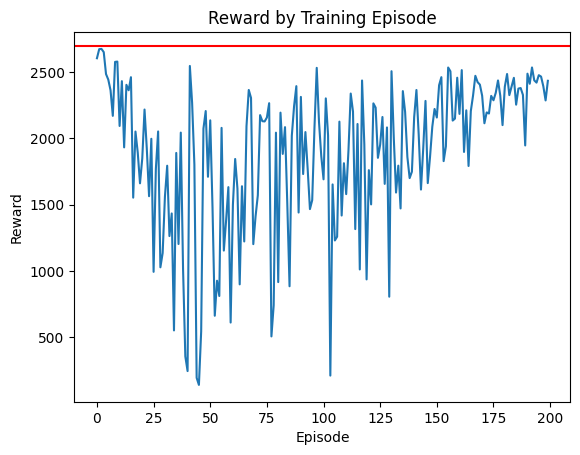

In [13]:
plt.title("Reward by Training Episode")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.plot(ending_ep_rewards)
plt.axhline(y=2695.57, color='r', linestyle='-')
plt.show()

In [14]:
test_stats = []
num_test_episodes = 15
print("========= Testing =========")

for episode in range(num_test_episodes):
    test_stats.append({
        "num_apples": [],
        "num_dirt": [],
        "pickers": [],
        "cleaners": [],
        "total_reward": 0,
    })

    states, info = env.reset()
    test_stats[-1]["num_apples"].append(info["apple"])
    test_stats[-1]["num_dirt"].append(info["dirt"])
    test_stats[-1]["pickers"].append(info["picker"])
    test_stats[-1]["cleaners"].append(info["cleaner"])

    #states = np.concatenate(list(states.values()), axis=0)
    state = states[agent_ids[0]]

    print(f"info: {info}")

    for step in tqdm(range(num_steps_per_epsiode)):
        actions_list = agentCoordinator.act(env)[0]
        actions = {agent_id: actions_list[i] for i, agent_id in enumerate(agent_ids)}
        next_states, reward, dones, _, info = env.step(actions)
        test_stats[-1]["num_apples"].append(info["apple"])
        test_stats[-1]["num_dirt"].append(info["dirt"])
        test_stats[-1]["pickers"].append(info["picker"])
        test_stats[-1]["cleaners"].append(info["cleaner"])
        #next_states = np.concatenate(list(next_states.values()), axis=0)
        next_state = next_states[agent_ids[0]]
        #reward_graph.append(reward)

        if episode > verbose_episode:
            print(f"========= Step {step} =========")
            print(f"info: {info}")

        state = next_state

        if dones["__all__"]:
            break 

    print(f"ending info: {info}")
    #print(f"reward graph: {reward_graph}")
    print(f"========= End of Test =========")

    test_reward = info["total_apple_consumed"]

    test_stats[-1]["total_reward"] = test_reward

    print(test_reward)

========= Testing =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 7241.33it/s]


ending info: {'total_apple_consumed': 358.67148355096793, 'step_apple_consumed': 0.36794514077419876, 'apple': 6.10170714231889, 'dirt': 57.70910397084323, 'picker': 9, 'cleaner': 1}
========= End of Test =========
358.67148355096793
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 7853.28it/s]


ending info: {'total_apple_consumed': 367.2532196746374, 'step_apple_consumed': 0.32556812810439784, 'apple': 6.152377176459883, 'dirt': 57.408610461184935, 'picker': 8, 'cleaner': 2}
========= End of Test =========
367.2532196746374
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 7960.54it/s]


ending info: {'total_apple_consumed': 373.94913174085264, 'step_apple_consumed': 0.36709208019445994, 'apple': 6.097788463323488, 'dirt': 57.630930701156295, 'picker': 9, 'cleaner': 1}
========= End of Test =========
373.94913174085264
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 6424.72it/s]


ending info: {'total_apple_consumed': 360.0363540022568, 'step_apple_consumed': 0.43256319459009346, 'apple': 6.45297694345833, 'dirt': 57.190898173358164, 'picker': 10, 'cleaner': 0}
========= End of Test =========
360.0363540022568
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 8030.29it/s]


ending info: {'total_apple_consumed': 376.0155636934321, 'step_apple_consumed': 0.3676551357990878, 'apple': 6.089296209966756, 'dirt': 57.774214490087886, 'picker': 9, 'cleaner': 1}
========= End of Test =========
376.0155636934321
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 8591.18it/s]


ending info: {'total_apple_consumed': 384.02839826441334, 'step_apple_consumed': 0.3251306312134364, 'apple': 6.140706990651731, 'dirt': 57.440924524580126, 'picker': 8, 'cleaner': 2}
========= End of Test =========
384.02839826441334
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 7380.32it/s]


ending info: {'total_apple_consumed': 367.69909669868906, 'step_apple_consumed': 0.24486421334386943, 'apple': 6.345374618628085, 'dirt': 56.62165380654991, 'picker': 6, 'cleaner': 4}
========= End of Test =========
367.69909669868906
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 8072.85it/s]


ending info: {'total_apple_consumed': 376.69438064936196, 'step_apple_consumed': 0.45892117558885787, 'apple': 6.58615387643427, 'dirt': 59.15618818174782, 'picker': 10, 'cleaner': 0}
========= End of Test =========
376.69438064936196
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 8541.88it/s]


ending info: {'total_apple_consumed': 378.8431341017287, 'step_apple_consumed': 0.38045444793956745, 'apple': 6.29802365934005, 'dirt': 57.70631193141937, 'picker': 9, 'cleaner': 1}
========= End of Test =========
378.8431341017287
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 8635.95it/s]


ending info: {'total_apple_consumed': 357.7238327005332, 'step_apple_consumed': 0.36855139904651685, 'apple': 6.138618745047372, 'dirt': 57.482233158742545, 'picker': 9, 'cleaner': 1}
========= End of Test =========
357.7238327005332
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 8497.28it/s]


ending info: {'total_apple_consumed': 392.50189778844856, 'step_apple_consumed': 0.3679187950271168, 'apple': 6.117441516578515, 'dirt': 57.57547259734881, 'picker': 9, 'cleaner': 1}
========= End of Test =========
392.50189778844856
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 8631.34it/s]


ending info: {'total_apple_consumed': 370.06654847062043, 'step_apple_consumed': 0.4558499648645052, 'apple': 6.593711613831986, 'dirt': 58.73489911892572, 'picker': 10, 'cleaner': 0}
========= End of Test =========
370.06654847062043
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 7890.99it/s]


ending info: {'total_apple_consumed': 375.84769040431615, 'step_apple_consumed': 0.32560812383061744, 'apple': 6.156159262208118, 'dirt': 57.383185675464894, 'picker': 8, 'cleaner': 2}
========= End of Test =========
375.84769040431615
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 8866.53it/s]


ending info: {'total_apple_consumed': 388.0445636268538, 'step_apple_consumed': 0.1304741216606009, 'apple': 7.215096554541509, 'dirt': 53.651128390232806, 'picker': 3, 'cleaner': 7}
========= End of Test =========
388.0445636268538
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 8706.32it/s]

ending info: {'total_apple_consumed': 369.2342071431424, 'step_apple_consumed': 0.32807166434354246, 'apple': 6.134402047693273, 'dirt': 57.92513098817605, 'picker': 8, 'cleaner': 2}
========= End of Test =========
369.2342071431424


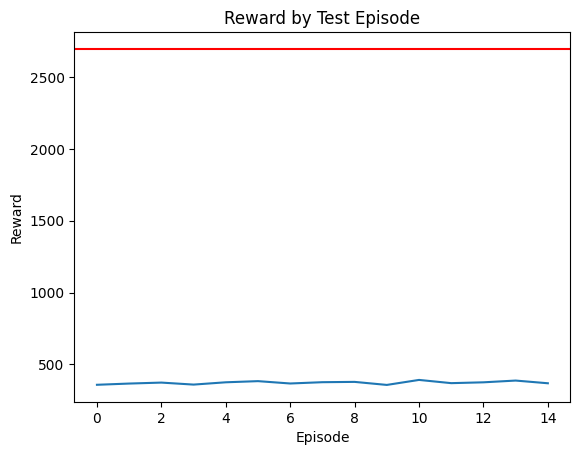

average reward 373.10730016735033


In [15]:
plt.figure()
plt.title("Reward by Test Episode")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.plot([stat['total_reward'] for stat in test_stats])
plt.axhline(y=2695.57, color='r', linestyle='-')
plt.show()
print('average reward', np.mean([stat['total_reward'] for stat in test_stats]))

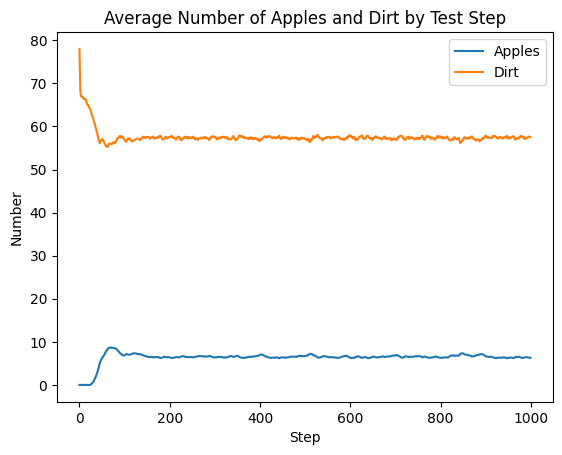

In [16]:
plt.figure()
plt.title("Average Number of Apples and Dirt by Test Step")
plt.xlabel("Step")
plt.ylabel("Number")
avg_num_apples = []
avg_num_dirt = []
for i in range(num_steps_per_epsiode):
    avg_num_apples.append(np.mean([stat['num_apples'][i] for stat in test_stats]))
    avg_num_dirt.append(np.mean([stat['num_dirt'][i] for stat in test_stats]))
plt.plot(avg_num_apples, label="Apples")
plt.plot(avg_num_dirt, label="Dirt")
plt.legend()
plt.show()

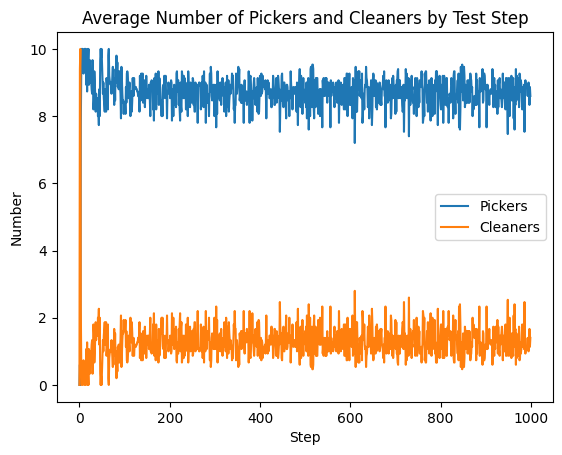

In [17]:
plt.figure()
plt.title("Average Number of Pickers and Cleaners by Test Step")
plt.xlabel("Step")
plt.ylabel("Number")
avg_num_pickers = []
avg_num_cleaners = []
for i in range(num_steps_per_epsiode):
    avg_num_pickers.append(np.mean([stat['pickers'][i] for stat in test_stats]))
    avg_num_cleaners.append(np.mean([stat['cleaners'][i] for stat in test_stats]))
plt.plot(avg_num_pickers, label="Pickers")
plt.plot(avg_num_cleaners, label="Cleaners")
plt.legend()
plt.show()

average number of pickers 8.737262737262737
average number of cleaners 1.2527472527472527


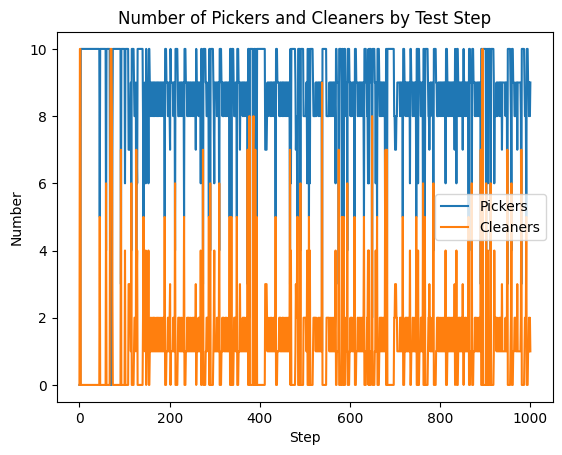

In [18]:
plt.figure()
plt.title("Number of Pickers and Cleaners by Test Step")
plt.xlabel("Step")
plt.ylabel("Number")
episode = test_stats[0]
plt.plot(episode['pickers'], label="Pickers")
plt.plot(episode['cleaners'], label="Cleaners")
print('average number of pickers', np.mean(episode['pickers']))
print('average number of cleaners', np.mean(episode['cleaners']))
plt.legend()
plt.show()

average picker cleaner ratio 6.2705810075478325
average apple dirt ratio 0.10723395927517704


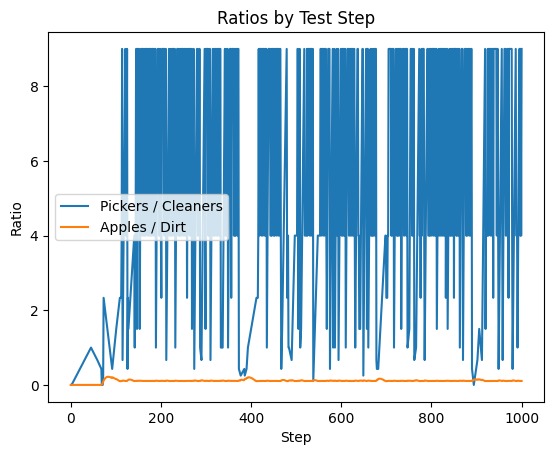

In [19]:
plt.figure()
plt.title("Ratios by Test Step")
plt.xlabel("Step")
plt.ylabel("Ratio")
episode = test_stats[0]
#plt.plot([episode['pickers'][i] / (episode['cleaners'][i] + 1e-1) for i in range(len(episode['pickers']))])

picker_cleaner_ratios = []
picker_cleaner_steps = []
for i, (num_pickers, num_cleaners) in enumerate(zip(episode['pickers'], episode['cleaners'])):
    if num_cleaners > 0:
        picker_cleaner_ratios.append(num_pickers / num_cleaners)
        picker_cleaner_steps.append(i)
print('average picker cleaner ratio', np.mean(picker_cleaner_ratios))
plt.plot(picker_cleaner_steps, picker_cleaner_ratios, label='Pickers / Cleaners')

apple_dirt_ratios = []
apple_dirt_steps = []
for i, (num_apples, num_dirt) in enumerate(zip(episode['num_apples'], episode['num_dirt'])):
    if num_dirt > 0:
        apple_dirt_ratios.append(num_apples / num_dirt)
        apple_dirt_steps.append(i)
plt.plot(apple_dirt_steps, apple_dirt_ratios, label='Apples / Dirt')
print('average apple dirt ratio', np.mean(apple_dirt_ratios))
plt.legend()
plt.show()

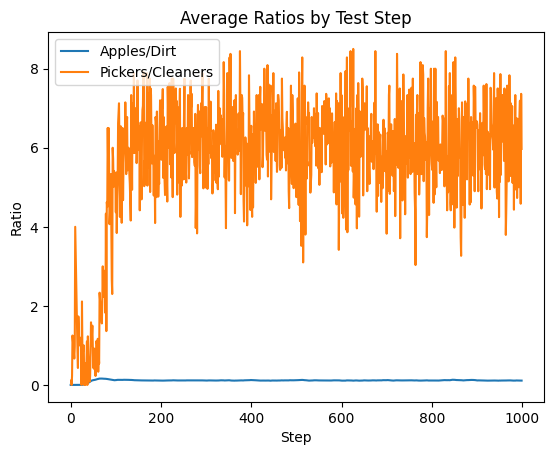

In [20]:
plt.figure()
plt.title("Average Ratios by Test Step")
plt.xlabel("Step")
plt.ylabel("Ratio")
avg_apple_dirt_ratios = []
apple_dirt_steps = []
avg_picker_cleaner_ratios = []
picker_cleaner_steps = []
for i in range(num_steps_per_epsiode):
    #avg_apple_dirt_ratios.append(np.mean([stat['num_apples'][i] / (stat['num_dirt'][i] + 1e-8) for stat in test_stats]))
    #avg_picker_cleaner_ratios.append(np.mean([stat['pickers'][i] / (stat['cleaners'][i]) for stat in test_stats if stat['cleaners'][i] > 0]))
    apple_dirt = []
    picker_cleaner = []
    for stat in test_stats:
        if stat['num_dirt'][i] > 0:
            apple_dirt.append(stat['num_apples'][i] / stat['num_dirt'][i])
        if stat['cleaners'][i] > 0:
            picker_cleaner.append(stat['pickers'][i] / stat['cleaners'][i])
    if len(apple_dirt) > 0:
        avg_apple_dirt_ratios.append(np.mean(apple_dirt))
        apple_dirt_steps.append(i)
    if len(picker_cleaner) > 0:
        avg_picker_cleaner_ratios.append(np.mean(picker_cleaner))
        picker_cleaner_steps.append(i)

plt.plot(apple_dirt_steps, avg_apple_dirt_ratios, label="Apples/Dirt")
plt.plot(picker_cleaner_steps, avg_picker_cleaner_ratios, label="Pickers/Cleaners")
plt.legend()
plt.show()